<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>


# <!-- TITLE --> [BHPD1] - Regression with a Dense Network (DNN)
<!-- DESC --> Simple example of a regression with the dataset Boston Housing Prices Dataset (BHPD)
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Predicts **housing prices** from a set of house features. 
 - Understanding the **principle** and the **architecture** of a regression with a **dense neural network**  


The **[Boston Housing Prices Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)** consists of price of houses in various places in Boston.  
Alongside with price, the dataset also provide theses informations : 

 - CRIM: This is the per capita crime rate by town
 - ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft
 - INDUS: This is the proportion of non-retail business acres per town
 - CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
 - NOX: This is the nitric oxides concentration (parts per 10 million)
 - RM: This is the average number of rooms per dwelling
 - AGE: This is the proportion of owner-occupied units built prior to 1940
 - DIS: This is the weighted distances to five Boston employment centers
 - RAD: This is the index of accessibility to radial highways
 - TAX: This is the full-value property-tax rate per 10,000 dollars
 - PTRATIO: This is the pupil-teacher ratio by town
 - B: This is calculated as 1000(Bk — 0.63)^2, where Bk is the proportion of people of African American descent by town
 - LSTAT: This is the percentage lower status of the population
 - MEDV: This is the median value of owner-occupied homes in 1000 dollars
## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Build a model
 - Train the model
 - Evaluate the result


## Step 1 - Import and init

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,sys

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('BHPD1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.5
Notebook id          : BHPD1
Run time             : Tuesday 26 January 2021, 11:05:39
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/tmp/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data

### 2.1 - Option 1  : From Keras
Boston housing is a famous historic dataset, so we can get it directly from [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)  

In [2]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data(test_split=0.2, seed=113)

### 2.2 - Option 2 : From a csv file
More fun !

In [3]:
data = pd.read_csv(f'{datasets_dir}/BHPD/origine/BostonHousing.csv', header=0)

display(data.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Missing Data :  0   Shape is :  (506, 14)


## Step 3 - Preparing the data
### 3.1 - Split data
We will use 70% of the data for training and 30% for validation.  
The dataset is **shuffled** and shared between **learning** and **testing**.  
x will be input data and y the expected output

In [4]:
# ---- Suffle and Split => train, test
#
data_train = data.sample(frac=0.7, axis=0)
data_test  = data.drop(data_train.index)

# ---- Split => x,y (medv is price)
#
x_train = data_train.drop('medv',  axis=1)
y_train = data_train['medv']
x_test  = data_test.drop('medv',   axis=1)
y_test  = data_test['medv']

print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)

Original data shape was :  (506, 14)
x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


### 3.2 - Data normalization
**Note :** 
 - All input data must be normalized, train and test.  
 - To do this we will **subtract the mean** and **divide by the standard deviation**.  
 - But test data should not be used in any way, even for normalization.  
 - The mean and the standard deviation will therefore only be calculated with the train data.

In [5]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.68,11.13,10.89,0.07,0.55,6.28,67.94,3.79,9.47,405.70,18.37,359.89,12.52
std,9.32,22.71,6.79,0.26,0.11,0.69,28.38,2.07,8.67,168.13,2.17,87.29,7.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,188.00,12.60,2.52,1.73
25%,0.08,0.00,4.93,0.00,0.45,5.88,43.47,2.10,4.00,277.00,17.00,376.71,6.88
50%,0.25,0.00,9.69,0.00,0.53,6.18,76.50,3.27,5.00,330.00,18.70,391.60,10.69
75%,3.40,12.50,18.10,0.00,0.62,6.63,93.75,5.19,24.00,666.00,20.20,396.90,17.11
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,10.71,24.00,711.00,22.00,396.90,37.97


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.39,-0.49,-1.54,-0.28,-1.48,-3.96,-2.29,-1.29,-0.98,-1.29,-2.66,-4.09,-1.50
25%,-0.39,-0.49,-0.88,-0.28,-0.91,-0.59,-0.86,-0.82,-0.63,-0.77,-0.63,0.19,-0.78
50%,-0.37,-0.49,-0.18,-0.28,-0.17,-0.14,0.30,-0.25,-0.52,-0.45,0.15,0.36,-0.26
75%,-0.03,0.06,1.06,-0.28,0.65,0.50,0.91,0.67,1.68,1.55,0.84,0.42,0.64
max,9.15,3.91,2.48,3.55,2.85,3.63,1.13,3.34,1.68,1.82,1.67,0.42,3.53


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
187,-0.39,1.49,-1.10,-0.28,-1.02,0.73,-0.95,-0.00,-0.52,-0.05,-1.46,0.39,-0.81
297,-0.38,-0.49,0.45,-0.28,-1.02,-0.72,-0.35,1.22,-0.63,-0.69,-1.10,0.42,0.46
148,-0.14,-0.49,1.28,-0.28,2.85,-1.60,0.91,-1.09,-0.52,-0.02,-1.70,-0.03,2.19
212,-0.37,-0.49,-0.04,3.55,-0.55,-0.69,-0.50,-0.07,-0.63,-0.77,0.10,0.36,0.49
243,-0.38,0.83,-0.88,-0.28,-1.10,0.16,-2.12,1.57,-0.40,-0.63,-0.82,0.17,-1.02


## Step 4 - Build a model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [6]:
  def get_model_v1(shape):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n3'))
    model.add(keras.layers.Dense(1, name='Output'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

## Step 5 - Train the model
### 5.1 - Get it

In [7]:
model=get_model_v1( (13,) )

model.summary()

# img=keras.utils.plot_model( model, to_file='./run/model.png', show_shapes=True, show_layer_names=True, dpi=96)
# display(img)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_n1 (Dense)             (None, 32)                448       
_________________________________________________________________
Dense_n2 (Dense)             (None, 64)                2112      
_________________________________________________________________
Dense_n3 (Dense)             (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


### 5.2 - Train it

In [8]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 60,
                    batch_size      = 10,
                    verbose         = 0,
                    validation_data = (x_test, y_test))

## Step 6 - Evaluate
### 6.1 - Model evaluation
MAE =  Mean Absolute Error (between the labels and predictions)  
A mae equal to 3 represents an average error in prediction of $3k.

In [9]:
score = model.evaluate(x_test, y_test, verbose=1)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

1/5 [=====>........................] - ETA: 0s - loss: 3.5110 - mae: 1.5408 - mse: 3.5110

5/5 [==============================] - 0s 956us/step - loss: 9.3403 - mae: 2.0969 - mse: 9.3403


x_test / loss      : 9.3403
x_test / mae       : 2.0969
x_test / mse       : 9.3403


### 6.2 - Training history
What was the best result during our training ?

In [10]:
df=pd.DataFrame(data=history.history)
display(df)

,loss,mae,mse,val_loss,val_mae,val_mse
0,557.726257,21.831192,557.726257,465.410767,19.443037,465.410736
1,318.877411,15.442590,318.877411,103.988831,8.112327,103.988831
2,69.732025,6.398403,69.732025,51.505543,5.268475,51.505543
3,39.388409,4.640034,39.388409,34.674347,4.275979,34.674347
4,28.131756,3.866695,28.131756,27.692772,3.827654,27.692772
5,23.777824,3.556679,23.777824,22.575790,3.403368,22.575790
6,20.519739,3.294708,20.519739,21.762815,3.298342,21.762815
7,18.815275,3.125894,18.815275,18.112053,2.959999,18.112053
8,16.599741,2.892735,16.599739,17.557838,3.069333,17.557838
9,16.405441,2.918119,16.405441,16.186060,2.797933,16.186060


In [11]:
print("min( val_mae ) : {:.4f}".format( min(history.history["val_mae"]) ) )

min( val_mae ) : 2.0538


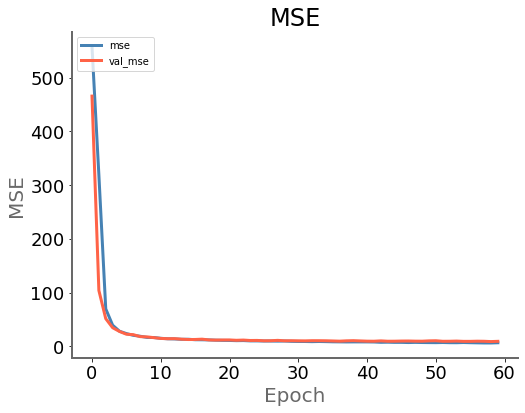

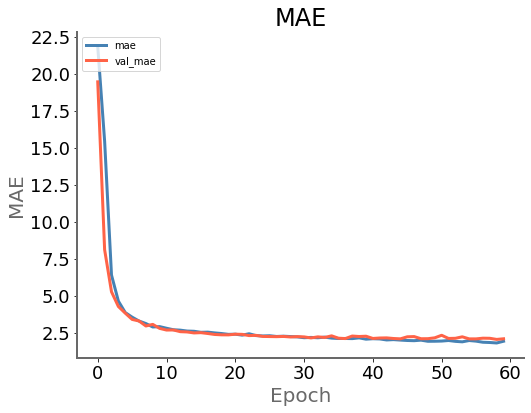

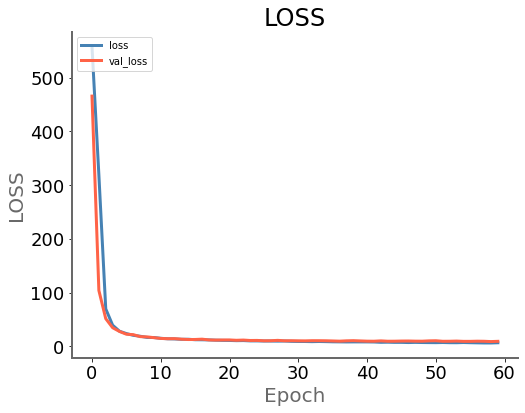

In [12]:
pwk.plot_history(history, plot={'MSE' :['mse', 'val_mse'],
                                'MAE' :['mae', 'val_mae'],
                                'LOSS':['loss','val_loss']}, save_as='01-history')

## Step 7 - Make a prediction
The data must be normalized with the parameters (mean, std) previously used.

In [13]:
my_data = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]
real_price = 10.4

my_data=np.array(my_data).reshape(1,13)

In [14]:

predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))

Prediction : 11.22 K$
Reality    : 10.40 K$


In [15]:
pwk.end()

End time is : Tuesday 26 January 2021, 11:05:44
Duration is : 00:00:06 724ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>